# Loan Data

This dataset consists of more than 9,500 loans with information on the loan structure, the borrower, and whether the loan was paid back in full. This data was extracted from LendingClub.com, which is a company that connects borrowers with investors.

## Data Dictionary

| Variable  | class     | description                    |
|:----------|:----------|:-------------------------------|
| credit_policy   | numeric | 1 if the customer meets the credit underwriting criteria; 0 otherwise. |
| purpose      | character | The purpose of the loan. |
| int_rate      | numeric   | The interest rate of the loan (more risky borrowers are assigned higher interest rates).  |
| installment  | numeric   | The monthly installments owed by the borrower if the loan is funded. |
| log_annual_inc | numeric   | The natural log of the self-reported annual income of the borrower. |
| dti | numeric   | The debt-to-income ratio of the borrower (amount of debt divided by annual income). |
| fico | numeric   | The FICO credit score of the borrower. |
| days_with_cr_line | numeric   | The number of days the borrower has had a credit line. |
| revol_bal | numeric   | The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle). |
| revol_util | numeric   | The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available). |
| inq_last_6mths | numeric   | The borrower's number of inquiries by creditors in the last 6 months. |
| delinq_2yrs | numeric   | The number of times the borrower had been 30+ days past due on a payment in the past 2 years. |
| pub_rec | numeric   | The borrower's number of derogatory public records.
| not_fully_paid | numeric   | 1 if the loan is not fully paid; 0 otherwise.  |

[Source](https://www.kaggle.com/itssuru/loan-data) of dataset.

## Don't know where to start? 

**Challenges are brief tasks designed to help you practice specific skills:**
 
- 🗺️ **Explore**: Generate a correlation matrix between the numeric columns. What columns are positively and negatively correlated with each other? Does it change if you segment it by the purpose of the loan?
- 📊 **Visualize**: Plot histograms for every numeric column with a color element to segment the bars by `not_fully_paid`.
- 🔎 **Analyze**: Do loans with the same purpose have similar qualities not shared by loans with differing purposes? You can consider only fully paid loans.

**Scenarios are broader questions to help you develop an end-to-end project for your portfolio:**

You recently got a job as a machine learning scientist at a startup that wants to automate loan approvals. As your first project, your manager would like you to build a classifier to predict whether a loan will be paid back based on this data. There are two things to note. First, there is class imbalance; there are fewer examples of loans not fully paid. Second, it's more important to accurately predict whether a loan will not be paid back rather than if a loan is paid back. Your manager will want to know how you accounted for this in training and evaluation your model.

You will need to prepare a report that is accessible to a broad audience. It will need to outline your motivation, analysis steps, findings, and conclusions.

---

✍️ _If you have an idea for an interesting Scenario or Challenge, or have feedback on our existing ones, let us know! You can submit feedback by pressing the question mark in the top right corner of the screen and selecting "Give Feedback". Include the phrase "Content Feedback" to help us flag it in our system._

In [2]:
suppressPackageStartupMessages(library(tidyverse))

loans <- read_csv('data/loans.csv.gz', show_col_types = FALSE)
head(loans)

credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,debt_consolidation,0.1189,829.10,11.35041,19.48,737,5639.958,28854,52.1,0,0,0,0
1,credit_card,0.1071,228.22,11.08214,14.29,707,2760.000,33623,76.7,0,0,0,0
1,debt_consolidation,0.1357,366.86,10.37349,11.63,682,4710.000,3511,25.6,1,0,0,0
1,debt_consolidation,0.1008,162.34,11.35041,8.10,712,2699.958,33667,73.2,1,0,0,0
1,credit_card,0.1426,102.92,11.29973,14.97,667,4066.000,4740,39.5,0,1,0,0
1,credit_card,0.0788,125.13,11.90497,16.98,727,6120.042,50807,51.0,0,0,0,0


In [3]:
unique(loans$purpose)
loans %>% 
    group_by(purpose) %>%
    count()

# Average interest rate grouped by purpose
loans %>% 
    group_by(purpose) %>% 
    summarize(avg_int_rate = mean(int_rate)) # small business interest rates are the highest

[1] "debt_consolidation" "credit_card"        "all_other"         
[4] "home_improvement"   "small_business"     "major_purchase"    
[7] "educational"

purpose,n
<chr>,<int>
all_other,2331
credit_card,1262
debt_consolidation,3957
educational,343
home_improvement,629
major_purchase,437
small_business,619


purpose,avg_int_rate
<chr>,<dbl>
all_other,0.1167705
credit_card,0.1197382
debt_consolidation,0.1265950
educational,0.1199073
home_improvement,0.1175065
major_purchase,0.1141709
small_business,0.1380871


In [4]:
# paid loans object
loans_paid = loans %>%
                filter(not_fully_paid == 0)
str(loans_paid)

spec_tbl_df [8,045 × 14] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ credit_policy    : num [1:8045] 1 1 1 1 1 1 1 1 1 1 ...
 $ purpose          : chr [1:8045] "debt_consolidation" "credit_card" "debt_consolidation" "debt_consolidation" ...
 $ int_rate         : num [1:8045] 0.119 0.107 0.136 0.101 0.143 ...
 $ installment      : num [1:8045] 829 228 367 162 103 ...
 $ log_annual_inc   : num [1:8045] 11.4 11.1 10.4 11.4 11.3 ...
 $ dti              : num [1:8045] 19.5 14.3 11.6 8.1 15 ...
 $ fico             : num [1:8045] 737 707 682 712 667 727 682 707 677 662 ...
 $ days_with_cr_line: num [1:8045] 5640 2760 4710 2700 4066 ...
 $ revol_bal        : num [1:8045] 28854 33623 3511 33667 4740 ...
 $ revol_util       : num [1:8045] 52.1 76.7 25.6 73.2 39.5 51 51.1 23 71 18.2 ...
 $ inq_last_6mths   : num [1:8045] 0 0 1 1 0 0 1 1 2 2 ...
 $ delinq_2yrs      : num [1:8045] 0 0 0 0 1 0 0 0 0 1 ...
 $ pub_rec          : num [1:8045] 0 0 0 0 0 0 0 0 1 0 ...
 $ not_fully_paid   : num [1:8045] 0 

## Correlations: 
* **Major**
    + Fico vs Interest Rate (-0.71)
    + Credit Policy vs inquiries in last 6 months (+0.54)
    + Revolving Utilization Rate vs Interest Rate (+0.46)
* **Minor**
    + Revolving Balance vs log Annual Income (+0.37)
    + DTI vs Revolving Utilization Rate (+0.34)

corrplot 0.92 loaded



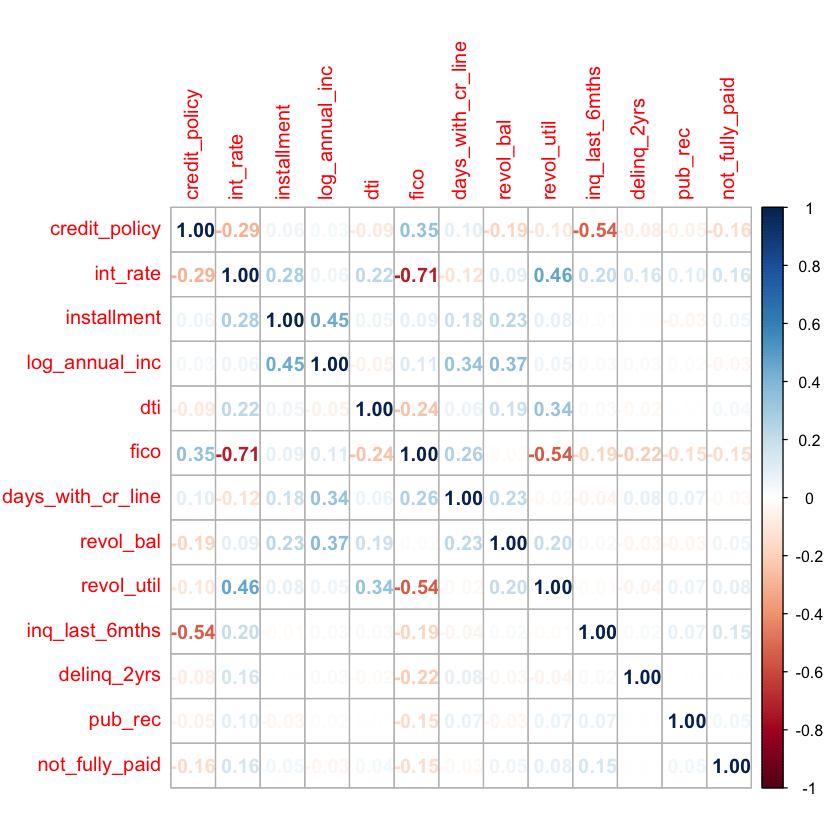

In [2]:
# Finding correlations via corrplot 
install.packages("corrplot")
library(corrplot)

loan_numeric <- loans[-2]

cors = cor(loan_numeric)
corrplot(cors, method = 'number')

# **What is the best predictor of a default?**
* Generalized Linear Models
    + GLM1 = not fully paid vs. all other variables
        + Identify/Remove Outliers
    + GLM2 = same as GLM1, with removed outliers


## **GLM 1** 


Call:
glm(formula = not_fully_paid ~ ., data = loan_numeric)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.79862  -0.18169  -0.12894  -0.05972   0.99297  

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        1.091e+00  1.608e-01   6.786 1.22e-11 ***
credit_policy     -5.628e-02  1.187e-02  -4.741 2.16e-06 ***
int_rate           7.506e-01  2.250e-01   3.336 0.000853 ***
installment        1.259e-04  2.231e-05   5.645 1.70e-08 ***
log_annual_inc    -5.026e-02  7.339e-03  -6.848 7.93e-12 ***
dti               -1.129e-03  5.801e-04  -1.945 0.051747 .  
fico              -7.028e-04  1.751e-04  -4.014 6.01e-05 ***
days_with_cr_line  1.748e-06  1.670e-06   1.047 0.295042    
revol_bal          5.322e-07  1.263e-07   4.216 2.52e-05 ***
revol_util         7.342e-05  1.652e-04   0.444 0.656745    
inq_last_6mths     1.567e-02  2.002e-03   7.826 5.59e-15 ***
delinq_2yrs       -1.283e-02  7.131e-03  -1.799 0.072106 .  
pub_re

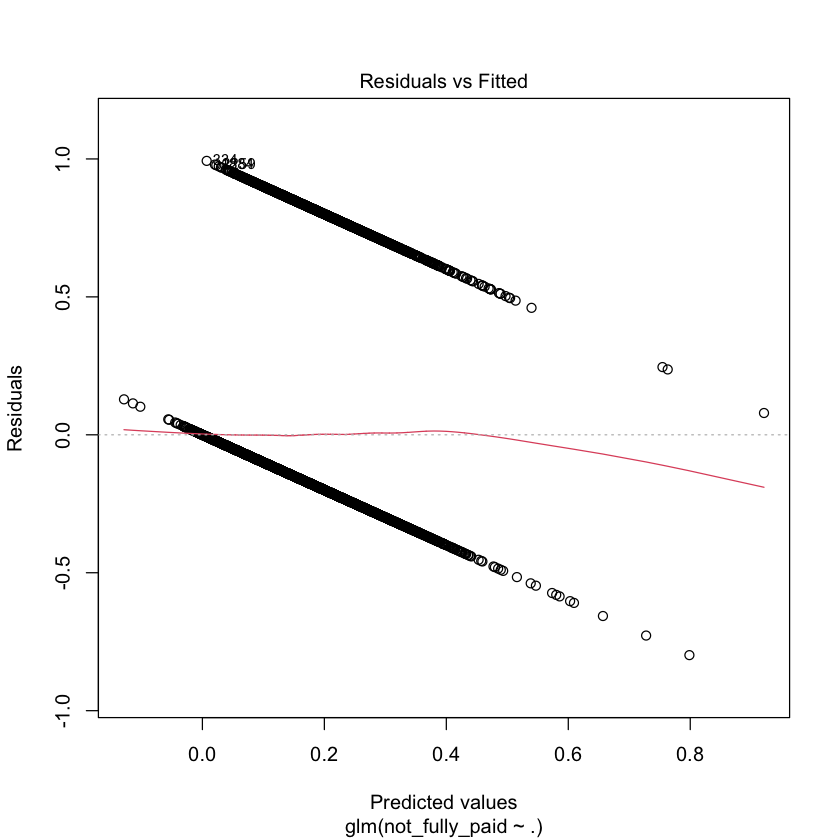

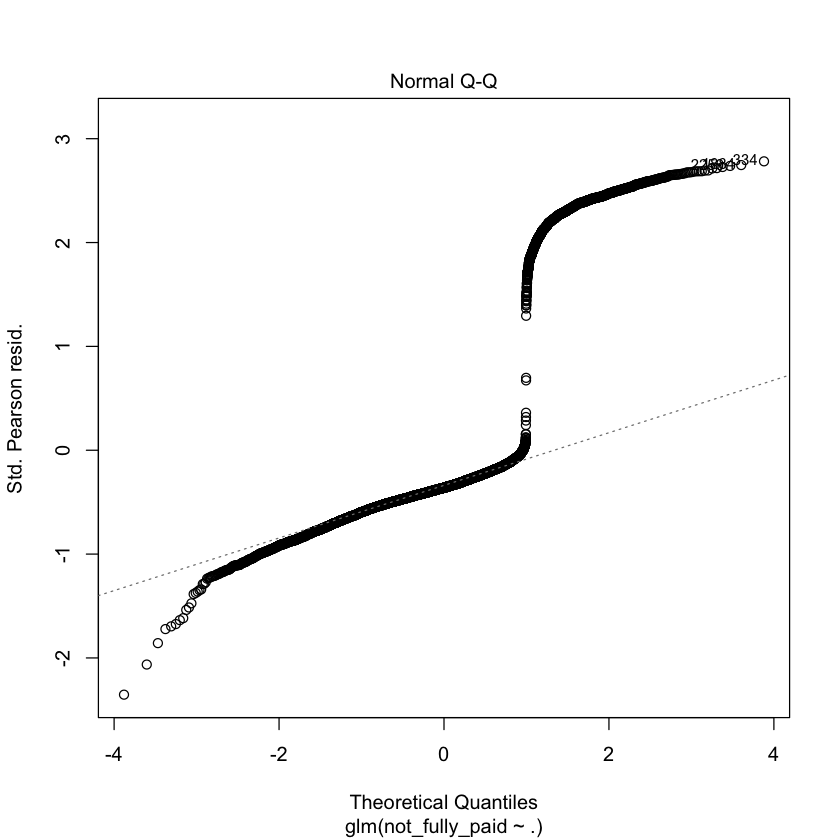

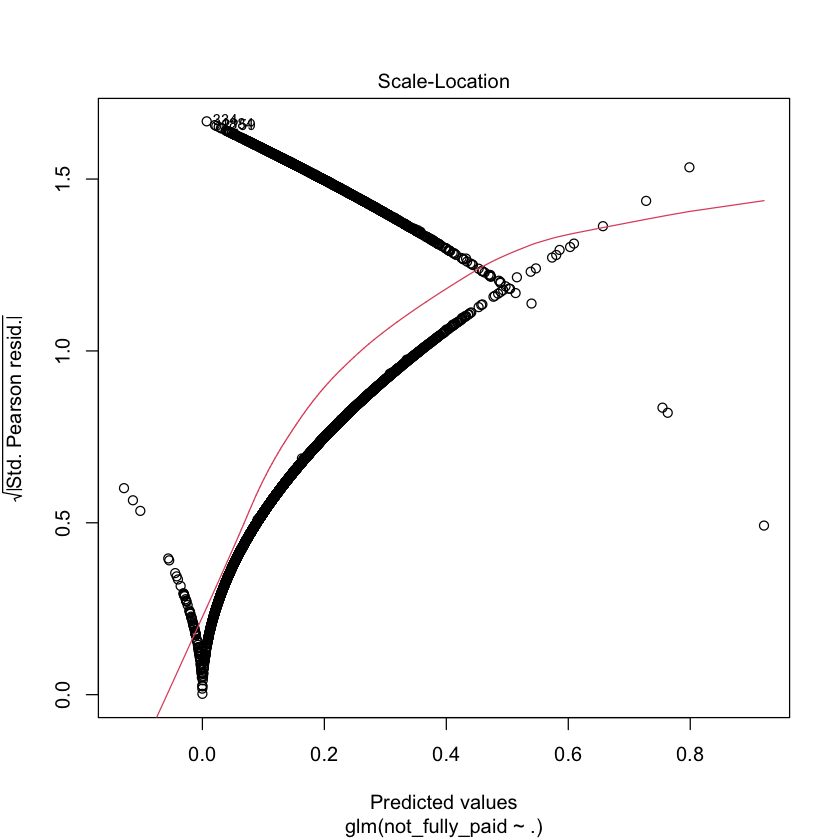

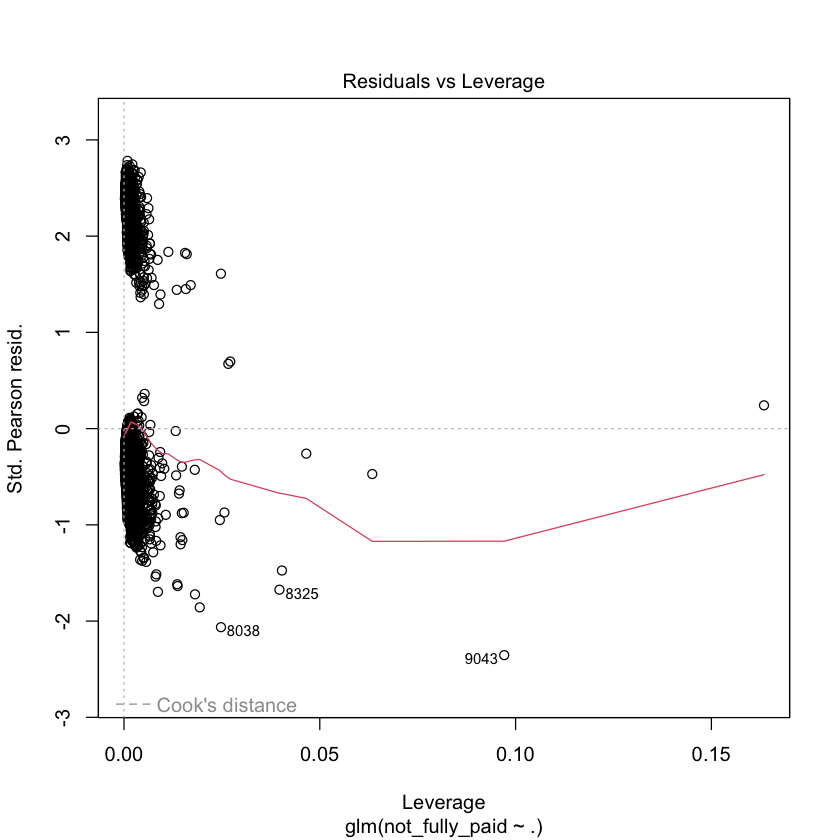

In [10]:
glm1 = glm(not_fully_paid ~ ., data = loan_numeric)
summary(glm1)
plot(glm1)

## Removing Outliers using Cook's Distance

In [29]:
library(car)
library(tidyverse)
loan_numeric$cooksd = cooks.distance(glm1)
loan_numeric$outlier = ifelse(loan_numeric$cooksd < 4/nrow(loan_numeric), "keep", "delete")
glimpse(loan_numeric)


Rows: 9,578
Columns: 15
$ credit_policy     <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ int_rate          <dbl> 0.1189, 0.1071, 0.1357, 0.1008, 0.1426, 0.0788, 0.14…
$ installment       <dbl> 829.10, 228.22, 366.86, 162.34, 102.92, 125.13, 194.…
$ log_annual_inc    <dbl> 11.350407, 11.082143, 10.373491, 11.350407, 11.29973…
$ dti               <dbl> 19.48, 14.29, 11.63, 8.10, 14.97, 16.98, 4.00, 11.08…
$ fico              <dbl> 737, 707, 682, 712, 667, 727, 667, 722, 682, 707, 67…
$ days_with_cr_line <dbl> 5639.958, 2760.000, 4710.000, 2699.958, 4066.000, 61…
$ revol_bal         <dbl> 28854, 33623, 3511, 33667, 4740, 50807, 3839, 24220,…
$ revol_util        <dbl> 52.1, 76.7, 25.6, 73.2, 39.5, 51.0, 76.8, 68.6, 51.1…
$ inq_last_6mths    <dbl> 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 0, 1…
$ delinq_2yrs       <dbl> 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0…
$ pub_rec           <dbl> 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0…
$ not_fully_paid

In [35]:
loan_numeric_cleaned = loan_numeric %>%
    filter(outlier == "keep")

In [40]:
# Remove outlier rows to allow for linear models 
loan_numeric = loan_numeric[-15]
loan_numeric_cleaned = loan_numeric_cleaned[-15]

## **GLM 2**


Call:
glm(formula = not_fully_paid ~ ., data = loan_numeric_cleaned)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.02530  -0.03577  -0.00577   0.02840   0.72954  

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -3.199e-01  5.091e-02  -6.284 3.46e-10 ***
credit_policy      1.372e-01  3.905e-03  35.137  < 2e-16 ***
int_rate          -1.628e+00  7.204e-02 -22.596  < 2e-16 ***
installment       -4.954e-05  6.982e-06  -7.096 1.39e-12 ***
log_annual_inc     5.058e-02  2.349e-03  21.528  < 2e-16 ***
dti                2.813e-03  1.805e-04  15.584  < 2e-16 ***
fico              -2.270e-04  5.467e-05  -4.152 3.33e-05 ***
days_with_cr_line -5.724e-06  5.149e-07 -11.117  < 2e-16 ***
revol_bal         -1.645e-06  5.718e-08 -28.775  < 2e-16 ***
revol_util         3.369e-04  5.198e-05   6.482 9.57e-11 ***
inq_last_6mths    -2.174e-02  7.857e-04 -27.665  < 2e-16 ***
delinq_2yrs       -3.506e-02  2.326e-03 -15.070  < 2e-16 **

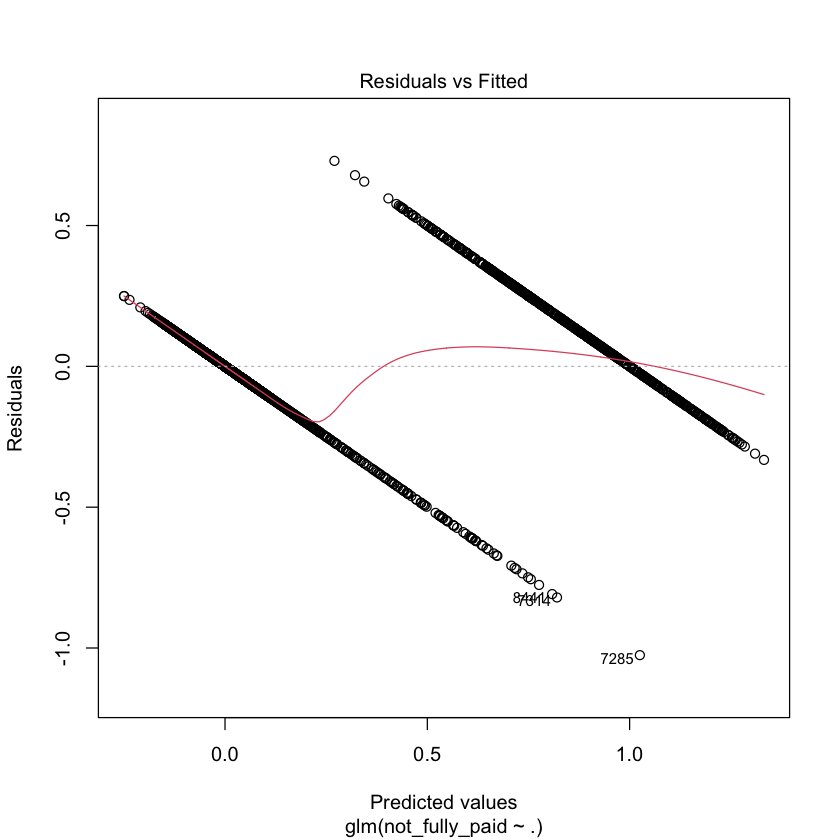

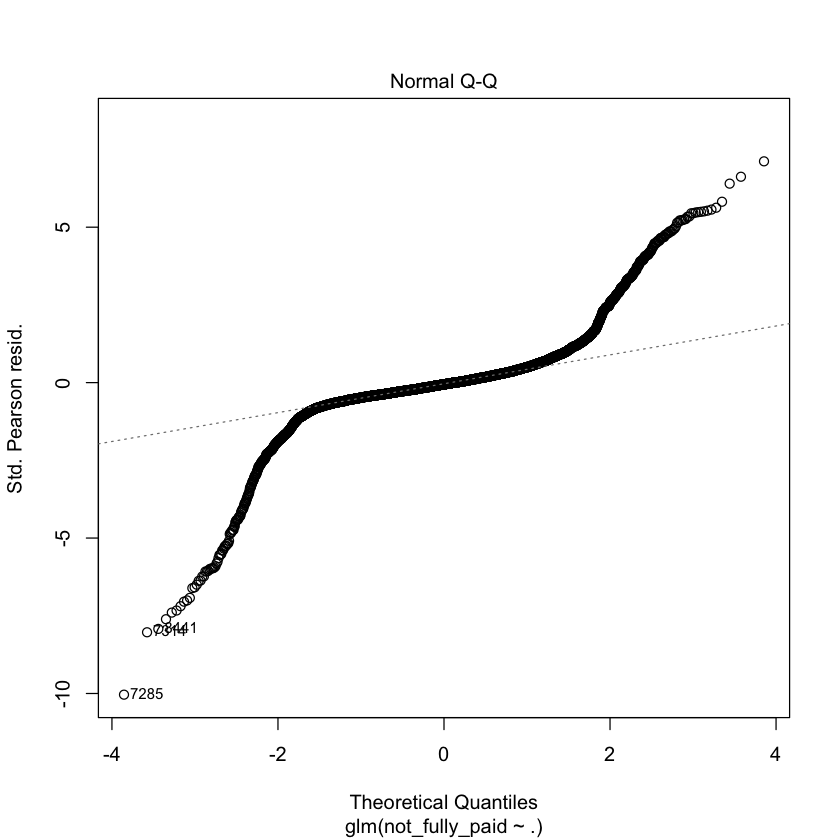

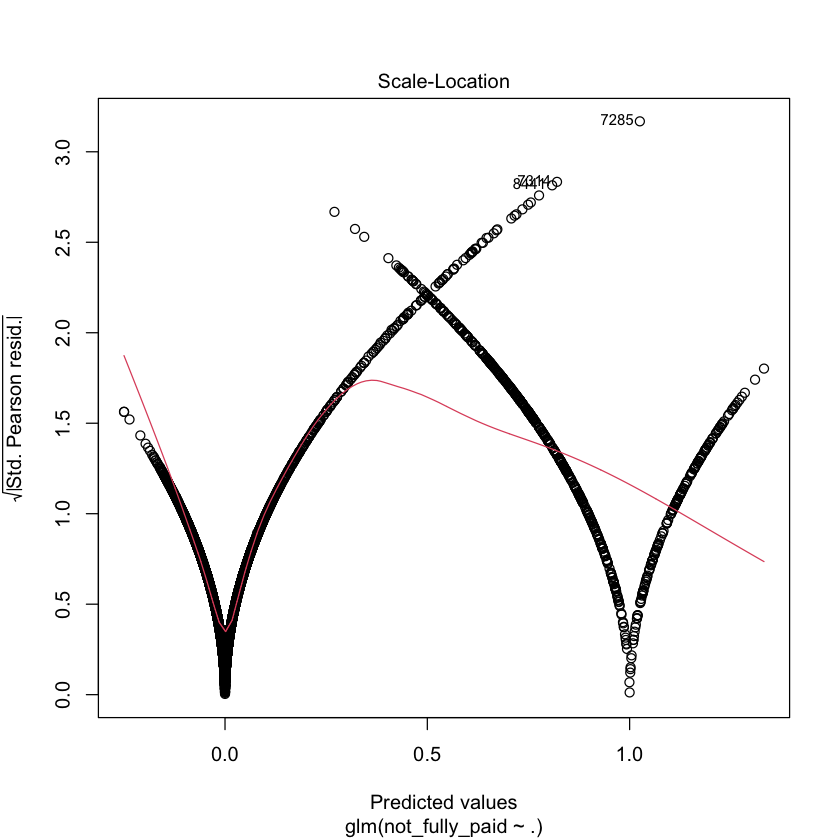

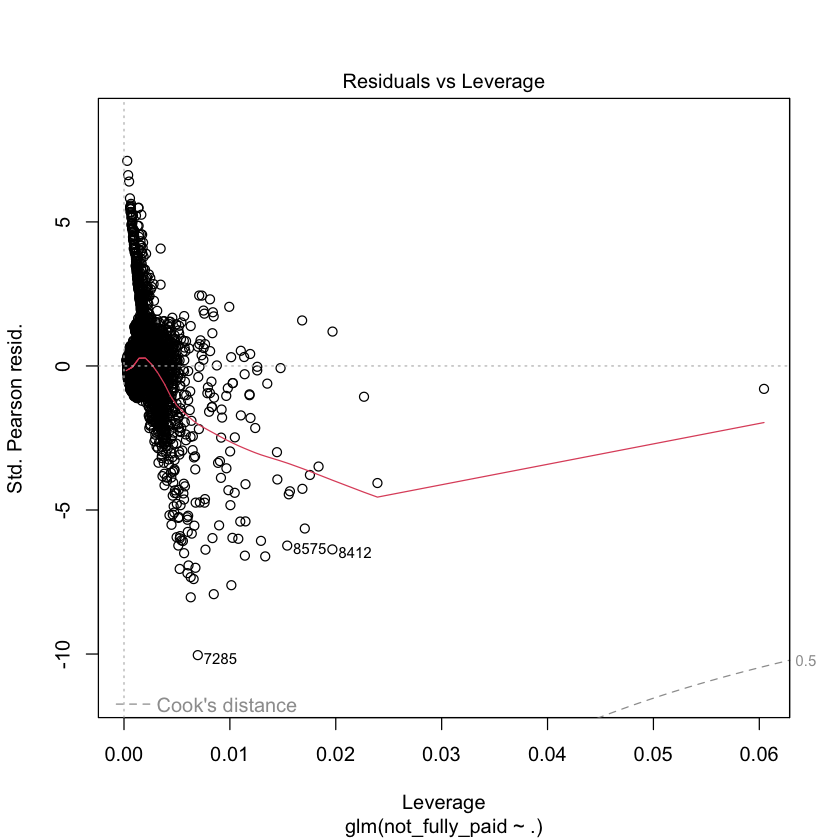

In [41]:
glm2 = glm(not_fully_paid ~ ., data = loan_numeric_cleaned)
summary(glm2)
plot(glm2)

## **GLM 3**


Call:
glm(formula = not_fully_paid ~ inq_last_6mths + credit_policy + 
    revol_bal + fico + log_annual_inc + installment + int_rate + 
    pub_rec, data = loan_numeric)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.78573  -0.18130  -0.12973  -0.06049   0.99516  

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     9.967e-01  1.454e-01   6.857 7.49e-12 ***
inq_last_6mths  1.571e-02  1.991e-03   7.891 3.32e-15 ***
credit_policy  -5.542e-02  1.181e-02  -4.691 2.76e-06 ***
revol_bal       5.267e-07  1.209e-07   4.356 1.34e-05 ***
fico           -6.180e-04  1.546e-04  -3.997 6.47e-05 ***
log_annual_inc -4.762e-02  7.064e-03  -6.741 1.66e-11 ***
installment     1.243e-04  2.228e-05   5.580 2.47e-08 ***
int_rate        7.495e-01  2.240e-01   3.346 0.000822 ***
pub_rec         4.032e-02  1.413e-02   2.854 0.004325 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family

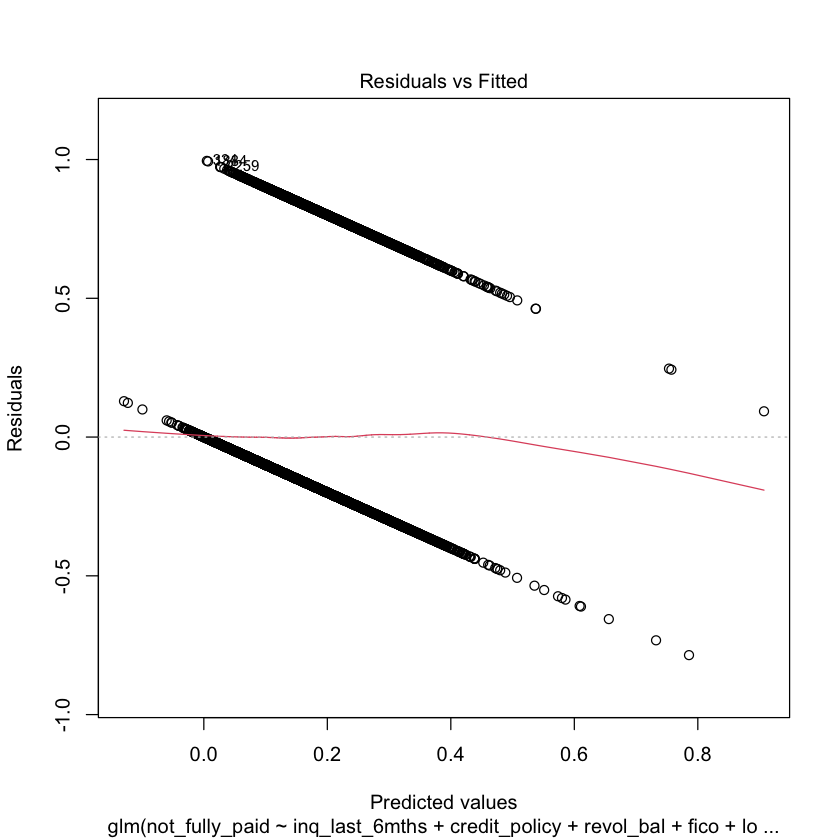

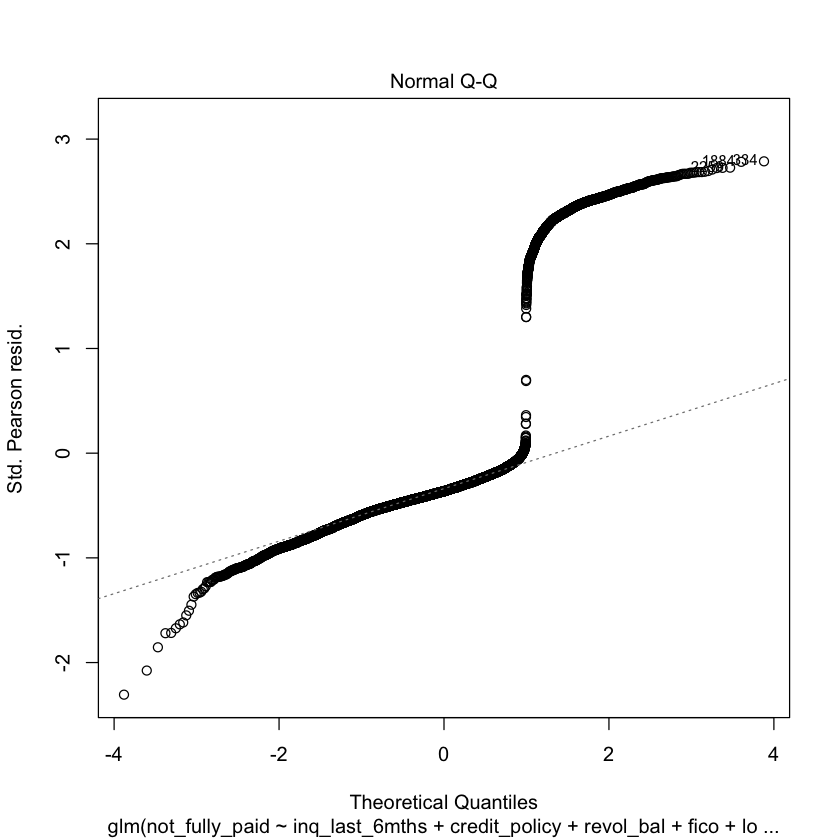

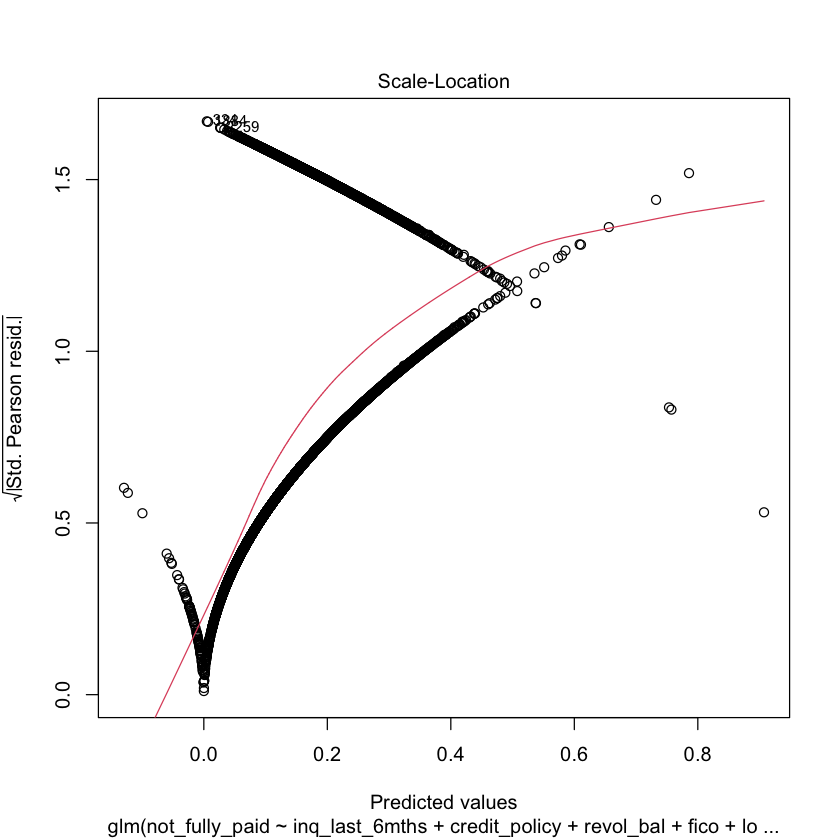

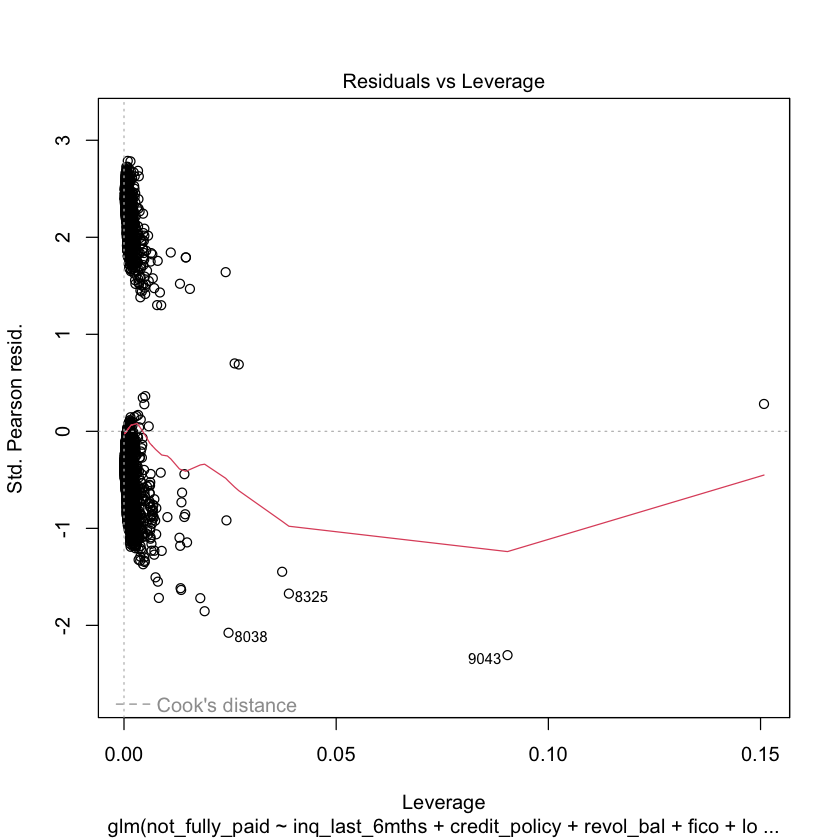

In [11]:
glm3 = glm(not_fully_paid ~ inq_last_6mths + credit_policy + revol_bal + fico + log_annual_inc + installment + int_rate + pub_rec, data = loan_numeric)
summary(glm3)
plot(glm3)



Call:
glm(formula = not_fully_paid ~ inq_last_6mths + int_rate, data = loan_numeric)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.7571  -0.1801  -0.1335  -0.0698   0.9680  

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -0.097822   0.017189  -5.691  1.3e-08 ***
inq_last_6mths  0.020351   0.001704  11.941  < 2e-16 ***
int_rate        1.840933   0.139677  13.180  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.1291326)

    Null deviance: 1287.6  on 9577  degrees of freedom
Residual deviance: 1236.4  on 9575  degrees of freedom
AIC: 7580.8

Number of Fisher Scoring iterations: 2


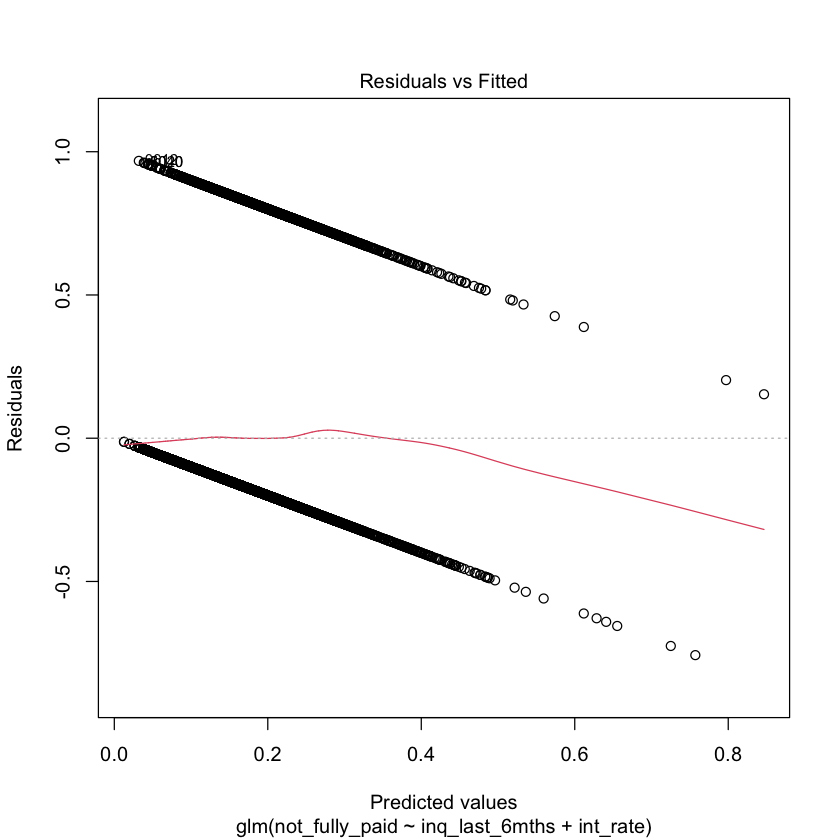

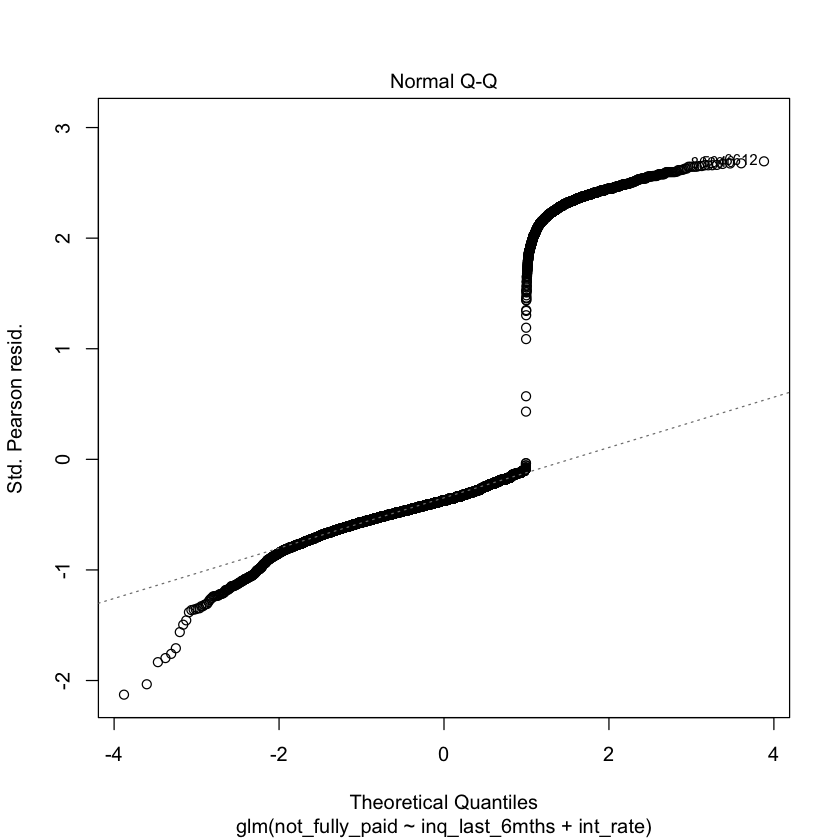

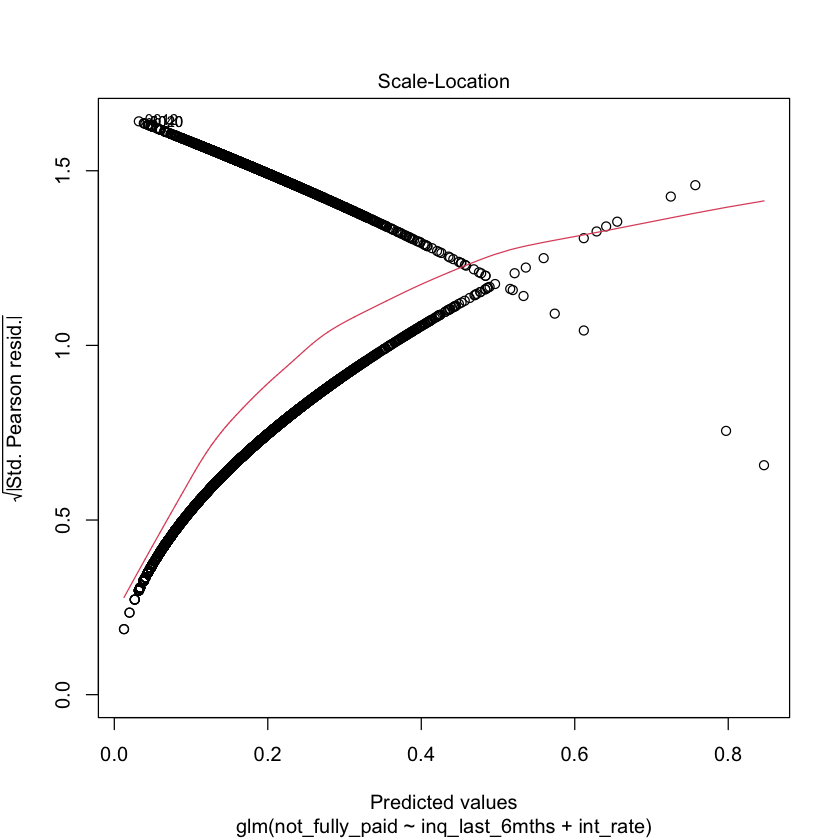

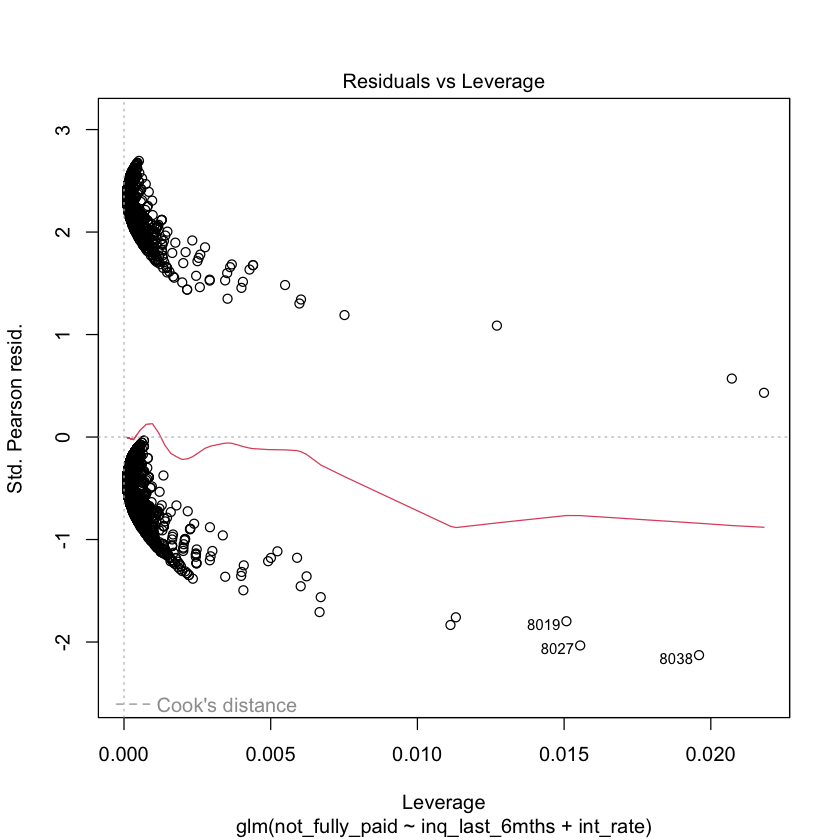

In [16]:
glm3 = glm(not_fully_paid ~ inq_last_6mths + int_rate, data = loan_numeric)
summary(glm3)
plot(glm3)